In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
sales = pd.read_csv('sales.csv')
sales.head(10)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [6]:
sales.rename(columns={'Unnamed: 0':'index'},inplace=True)
sales.set_index('index',inplace=True)

In [7]:
import datetime 
sales[["Year","Month","Day"]] = sales["date"].str.split("-", expand = True)
sales["date"]=pd.to_datetime(sales["date"])

In [8]:
sales.drop('date',axis=1,inplace=True)

In [9]:
sales=pd.get_dummies(sales, columns=['state_holiday'], drop_first=True)


In [10]:
sales = pd.get_dummies(sales, columns=['Year', 'Month'], drop_first=True)

In [11]:
sales=pd.get_dummies(sales, columns=['day_of_week'], drop_first=True)


In [12]:
sales.drop('Day', axis=1, inplace=True)

<Axes: >

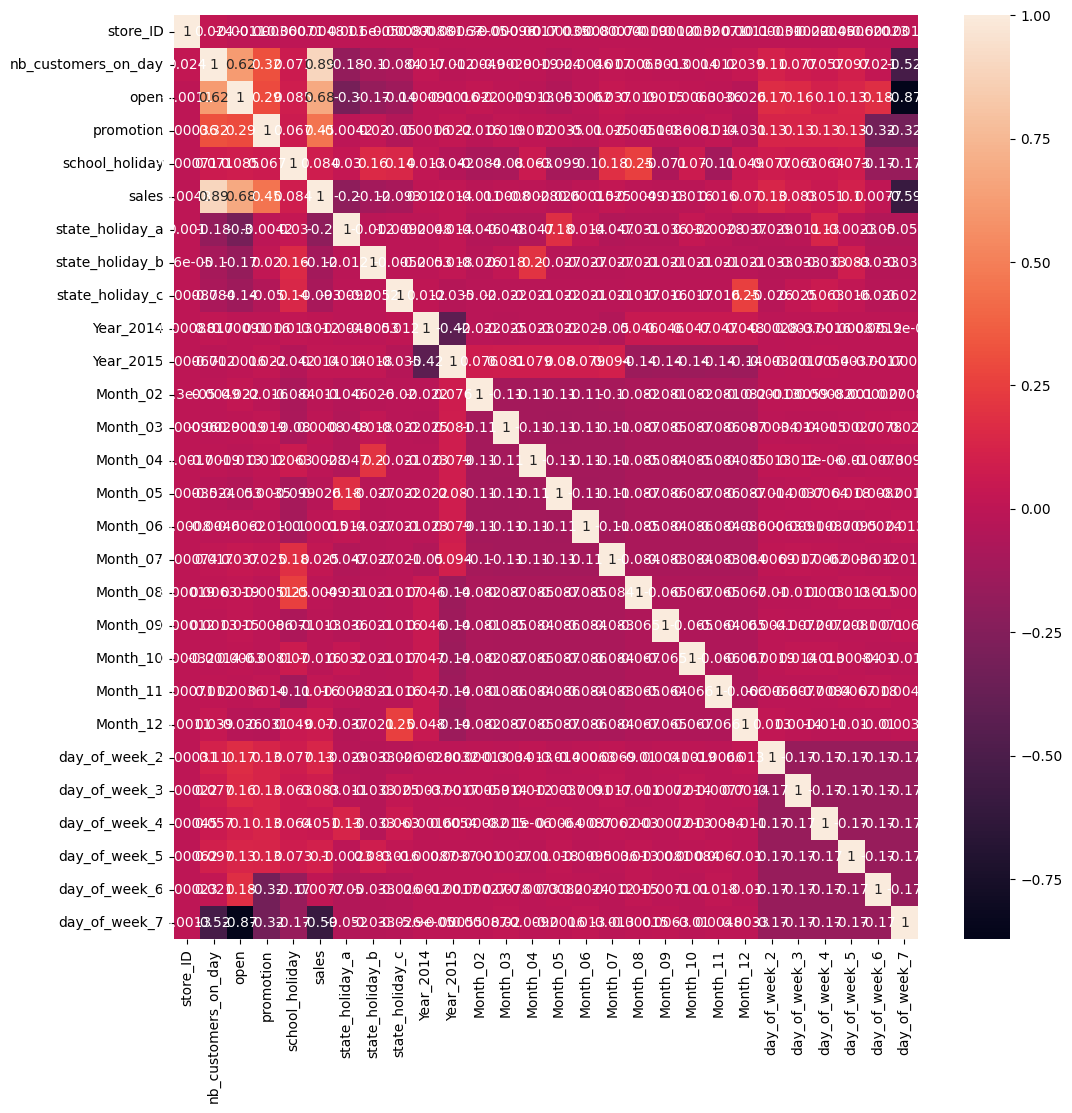

In [13]:
#analyzing correlations
plt.figure(figsize=(12,12))
sns.heatmap(sales.corr(),annot=True,cbar=True)

In [14]:
sales = sales.astype(int)


In [15]:
from sklearn.model_selection import train_test_split

X=sales.drop(['sales'],axis=1)
y=sales['sales']

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = sales.drop(['sales'], axis=1)
y = sales['sales']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# linear regression model
regr = LinearRegression()

# Train the model
model = regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 2050652.3983916135
R-squared: 0.8612288988612079


In [18]:
from sklearn import tree

In [19]:

from sklearn.tree import DecisionTreeRegressor, export_text
import matplotlib.pyplot as plt

# Create decision tree regressor object
regr = DecisionTreeRegressor()

# Train the decision tree model
model = regr.fit(X_train, y_train)

# Score the model
score = regr.score(X_test, y_test)
print(f'Model Score: {score}')

# Visualize the decision tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names=list(X_train.columns), filled=True)

# Display the decision tree rules
r = export_text(regr, feature_names=list(X_train.columns))
print(r)


KeyboardInterrupt: 

In [20]:
import xgboost as xgb

In [21]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Checking the score and if maybe overfitting
print(xgb_reg.score(X_test,y_test))
print(xgb_reg.score(X_train, y_train))

0.9305965156388029
0.9339796979829518


In [23]:
# where revenue is 0
data_new = sales.loc[sales["open"]==1]
data_new = sales.loc[sales["nb_customers_on_day"]!= 0]

In [24]:
data_new = data_new.astype(int)


In [25]:
data_new

,store_ID,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,Year_2014,...,Month_09,Month_10,Month_11,Month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
index,,,,,,,,,,,,,,,,,,,,,
425390,366,517,1,0,0,4422,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
291687,394,694,1,0,0,8297,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
411278,807,970,1,1,0,9729,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
664714,802,473,1,1,0,6513,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
540835,726,1068,1,1,0,10882,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,77,701,1,0,0,8219,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
359783,409,483,1,0,0,4553,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
152315,97,987,1,1,0,12307,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X2=data_new.drop(['sales'],axis=1)
y2=data_new['sales']

In [27]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)


In [28]:
xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
# Checking the score and overfitting
print(xgb_reg2.score(X2_test,y2_test))
print(xgb_reg2.score(X2_train, y2_train))

0.8688278513856246
0.874095504534613


In [30]:
y_pred = xgb_reg.predict(X_test)

y_pred

array([4043.2002 , 4989.764  , 5936.255  , ..., 7042.6685 ,  -31.07476,
       7439.2593 ], dtype=float32)

In [31]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  1012.714773


In [32]:

import pickle
pickle.dump(xgb_reg2,open("model.pkl","wb"))

In [ ]:
X_train.to_pickle('train_data.pkl')
y_train.to_pickle('train_label.pkl')

X_test.to_pickle('test_data.pkl')
y_test.to_pickle('test_label.pkl')

In [33]:
validation=pd.read_csv('validation_for students.csv')
validation.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [34]:
validation.dtypes

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [35]:
validation['date'] = pd.to_datetime(validation['date'], format='%d/%m/%Y')


In [36]:
validation

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015-03-01,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0
...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,2014-10-26,0,0,0,0,0
71201,687449,377,7,2013-08-18,0,0,0,0,0
71202,207393,15,3,2014-06-11,648,1,0,0,0
71203,233378,950,2,2013-04-23,626,1,1,0,0


In [37]:
validation[["Year", "Month", "Day"]] = validation["date"].apply(lambda x: pd.Series([x.year, x.month, x.day]))


C:\Users\minhl\AppData\Local\Temp\ipykernel_8864\2460065852.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  validation[["Year", "Month", "Day"]] = validation["date"].apply(lambda x: pd.Series([x.year, x.month, x.day]))


In [38]:
validation

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,Year,Month,Day
0,272371,415,7,2015-03-01,0,0,0,0,0,2015,3,1
1,558468,27,7,2013-12-29,0,0,0,0,0,2013,12,29
2,76950,404,3,2014-03-19,657,1,1,0,0,2014,3,19
3,77556,683,2,2013-01-29,862,1,0,0,0,2013,1,29
4,456344,920,3,2014-03-19,591,1,1,0,0,2014,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,2014-10-26,0,0,0,0,0,2014,10,26
71201,687449,377,7,2013-08-18,0,0,0,0,0,2013,8,18
71202,207393,15,3,2014-06-11,648,1,0,0,0,2014,6,11
71203,233378,950,2,2013-04-23,626,1,1,0,0,2013,4,23


In [39]:
validation.drop('date',axis=1,inplace=True)

In [40]:
validation.drop('Day', axis=1, inplace=True)

In [41]:
validation=pd.get_dummies(validation, columns=['state_holiday'], drop_first=True)
validation = pd.get_dummies(validation, columns=['Year', 'Month'], drop_first=True)
validation=pd.get_dummies(validation, columns=['day_of_week'], drop_first=True)


In [42]:
validation

,index,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,Year_2014,...,Month_9,Month_10,Month_11,Month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,272371,415,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,558468,27,0,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,76950,404,657,1,1,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,77556,683,862,1,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,456344,920,591,1,1,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,0,0,0,0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
71201,687449,377,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
71202,207393,15,648,1,0,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
71203,233378,950,626,1,1,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [43]:
validation = validation.astype(int)


<Axes: >

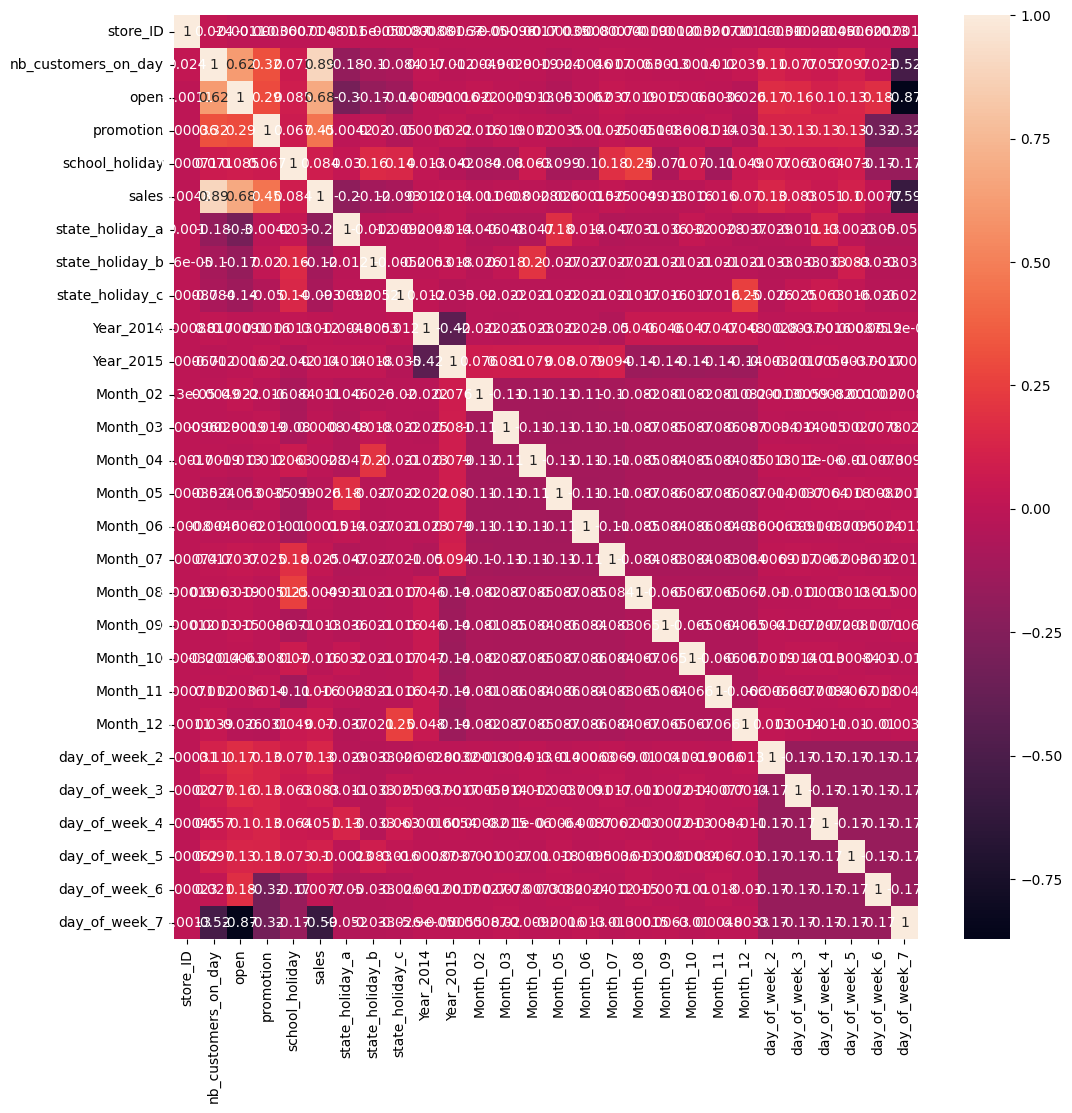

In [44]:
#analyzing correlations
plt.figure(figsize=(12,12))
sns.heatmap(sales.corr(),annot=True,cbar=True)

In [48]:
validation

,index,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,Year_2014,...,Month_9,Month_10,Month_11,Month_12,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,272371,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,558468,27,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,76950,404,657,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,77556,683,862,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,456344,920,591,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
71201,687449,377,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71202,207393,15,648,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
71203,233378,950,626,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:

validation.rename(columns={
    'Month_7': 'Month_07',
    'Month_9': 'Month_09',
    'Month_2': 'Month_02',
    'Month_5': 'Month_05',
    'Month_6': 'Month_06',
    'Month_8': 'Month_08',
    'Month_4': 'Month_04',
    'Month_3': 'Month_03'
}, inplace=True)


In [52]:
import pickle
import pandas as pd

# Load the saved XGBoost model
loaded_model = pickle.load(open("model.pkl", "rb"))

# Make predictions on the 'validation' dataset
predictions = loaded_model.predict(validation)

# Add the predictions to the 'validation' DataFrame if needed
validation['predicted_sales'] = predictions

ValueError: feature_names mismatch: ['store_ID', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'state_holiday_a', 'state_holiday_b', 'state_holiday_c', 'Year_2014', 'Year_2015', 'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06', 'Month_07', 'Month_08', 'Month_09', 'Month_10', 'Month_11', 'Month_12', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7'] ['index', 'store_ID', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'state_holiday_a', 'state_holiday_b', 'state_holiday_c', 'Year_2014', 'Year_2015', 'Month_02', 'Month_03', 'Month_04', 'Month_05', 'Month_06', 'Month_07', 'Month_08', 'Month_09', 'Month_10', 'Month_11', 'Month_12', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7']
training data did not have the following fields: index

In [53]:
validation.drop('index', axis=1, inplace=True)


In [54]:
import pickle
import pandas as pd

# Load the saved XGBoost model
loaded_model = pickle.load(open("model.pkl", "rb"))

# Make predictions on the 'validation' dataset
predictions = loaded_model.predict(validation)

# Add the predictions to the 'validation' DataFrame if needed
validation['predicted_sales'] = predictions

In [57]:
output_df = pd.DataFrame({'index': validation.index, 'predicted_sales': predictions})

# Save the new DataFrame to a CSV file
output_df.to_csv('sales_predictions.csv', index=False)